# **MA Model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **MA(1)**


# Yt = C + coefficient * Error t-1 + error t

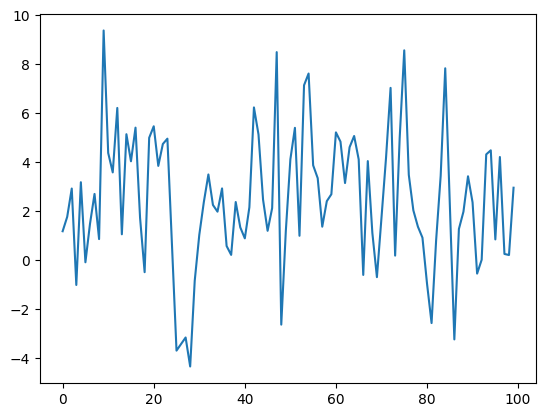

In [ ]:
# reproducibility
np.random.seed(12)

# create autocorrelated data
time = np.arange(100)


#mean 0
ma1_sample = np.zeros(100)


#create vector of random normally distributed errors
error = np.random.normal(loc=0, scale=2.5, size=100)

# set first value to one of the random errors
ma1_sample[0] += error[0]

#set future values to 0.4 times error of prior value plus the current error term
for t in time[1:]:
    ma1_sample[t] = 3 +(0.4 * error[t-1]) + error[t]

plt.plot(time,ma1_sample)

In [ ]:
#pip install statsmodels --upgrade

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:

#pip install statsmodels --upgrade

In [ ]:
model = ARIMA(ma1_sample, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -237.517
Date:                Thu, 08 Aug 2024   AIC                            481.033
Time:                        04:51:45   BIC                            488.849
Sample:                             0   HQIC                           484.196
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4631      0.348      7.075      0.000       1.781       3.145
ma.L1          0.3375      0.083      4.074      0.000       0.175       0.500
sigma2         6.7615      0.908      7.450      0.0

In [ ]:
pred1 = model_fit.predict(start=0, end=len(ma1_sample), dynamic=False)

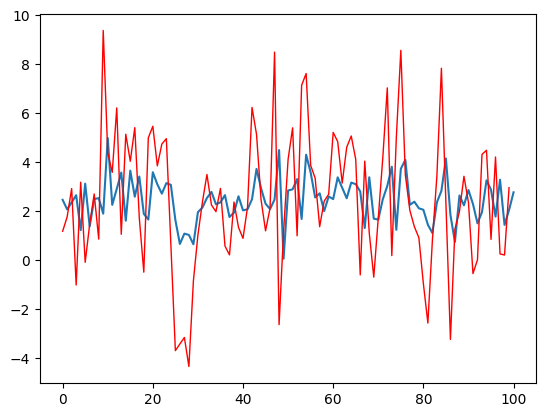

In [ ]:
plt.plot(pred1)
plt.plot(ma1_sample, color='red', linewidth=1)

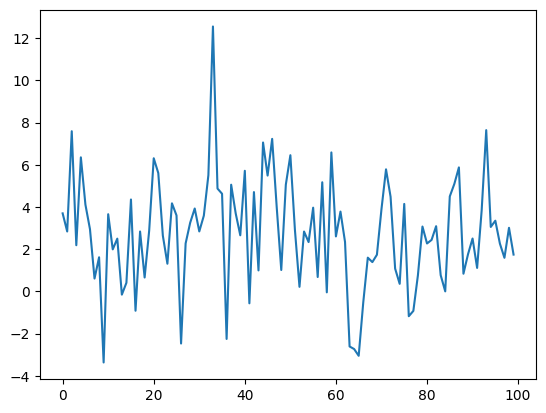

In [ ]:
# create autocorrelated data
np.random.seed(102)

ma2_sample = np.zeros(100)


#create vector of random normally distributed errors
error = np.random.normal(loc=0, scale=2.5, size=100)

# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ma2_sample[0:2] =  3 + np.random.normal(loc=0, scale=2.5, size=2)


# Set future values as 0.3 times the prior value and 0.3 times value two prior
for t in time[2:]:
    ma2_sample[t] = 3 + (0.3 * error[t-1]) + (0.3 * error[t-2]) + error[t]

plt.plot(time,ma2_sample)

In [ ]:
model2 = ARIMA(ma2_sample, order=(0,0,2))
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -233.832
Date:                Thu, 08 Aug 2024   AIC                            475.664
Time:                        04:52:00   BIC                            486.085
Sample:                             0   HQIC                           479.882
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7466      0.373      7.358      0.000       2.015       3.478
ma.L1          0.2393      0.108      2.213      0.027       0.027       0.451
ma.L2          0.2346      0.118      1.995      0.0

In [ ]:
pred2 = model2_fit.predict(start=0, end=len(ma1_sample), dynamic=False)

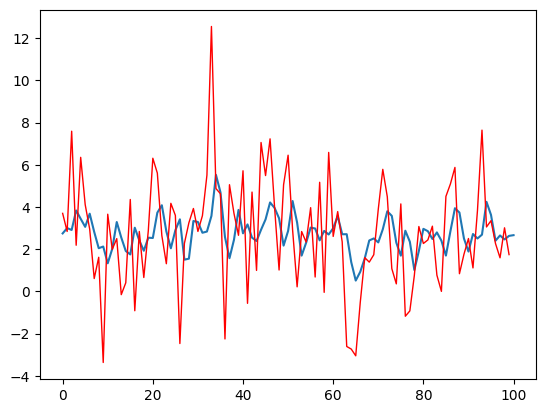

In [ ]:
plt.plot(pred2)
plt.plot(ma2_sample, color='red', linewidth=1)

In [ ]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res[0].shift(i)


  res_data = pd.DataFrame(res)

  res_train_2 = res_data.dropna()
  X_ = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_ = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_,y_)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()



  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_train_2[0], res_train_2['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,theta,intercept,RMSE]

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
df=pd.DataFrame(ma1_sample)
df_data,theta,intercept,RMSE=MA(1,df)

The RMSE is : 2.613958139427186 , Value of q :  1


<ipython-input-13-8000c6cf494d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_.dot(lr.coef_.T) + lr.intercept_


In [ ]:
theta

array([[0.31999329]])

In [ ]:
intercept

array([1.68935414])